In [1]:
import pandas as pd
df=pd.read_csv("/Users/somesh-19583/Desktop/Health Care/playground-series-s4e11/Cleaned_Data.csv")
df.head(5)

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,5.000000,2.000000,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,4.000000,3.000000,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,Teacher,3.096286,2.876204,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,5.000000,1.000000,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.000000,1.000000,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [2]:
numerical_cols = ['Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

categorical_cols=['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

Outlier Detection


In [3]:
import pandas as pd

def remove_outliers_iqr(df, numerical_cols):
    
    df_clean = df.copy()
    
    for col in numerical_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        before_rows = df_clean.shape[0]
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        after_rows = df_clean.shape[0]
        
        print(f"Column: {col} | Removed {before_rows - after_rows} outliers")
    
    return df_clean


df_cleaned = remove_outliers_iqr(df, numerical_cols)


Column: Age | Removed 0 outliers
Column: Work Pressure | Removed 0 outliers
Column: Job Satisfaction | Removed 0 outliers
Column: Work/Study Hours | Removed 0 outliers
Column: Financial Stress | Removed 0 outliers


Feature Engineering

In [4]:
# Define a function to categorize sleep based on the given ranges
def categorize_sleep_duration(duration):
    if duration in ['Less than 5 hours', '1-2 hours', '2-3 hours']:
        return 1  # Low Sleep
    elif duration in ['5-6 hours', '6-7 hours', '7-8 hours', '8 hours']:
        return 2  # Average Sleep
    else:
        return 3  # High Sleep (for 'More than 8 hours', '9-11 hours', '10-11 hours')

# Apply the categorization to the 'Sleep Duration' column
df['Sleep_Category'] = df['Sleep Duration'].apply(categorize_sleep_duration)

# Drop the 'Sleep Duration' column
df.drop(columns=['Sleep Duration'], inplace=True)

# Display the updated DataFrame
df.head()


,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep_Category
0,Female,49.0,Ludhiana,Working Professional,Chef,5.000000,2.000000,Healthy,BHM,No,1.0,2.0,No,0,3
1,Male,26.0,Varanasi,Working Professional,Teacher,4.000000,3.000000,Unhealthy,LLB,Yes,7.0,3.0,No,1,1
2,Male,33.0,Visakhapatnam,Student,Teacher,3.096286,2.876204,Healthy,B.Pharm,Yes,3.0,1.0,No,1,2
3,Male,22.0,Mumbai,Working Professional,Teacher,5.000000,1.000000,Moderate,BBA,Yes,10.0,1.0,Yes,1,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.000000,1.000000,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,2


Encoding Categorical to Numerical Data

In [5]:
# Convert 'Yes'/'No' to 1/0 for the relevant columns
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})
df['Dietary Habits'] = df['Dietary Habits'].replace({'Unhealthy': 0, 'Moderate': 1, 'Healthy' : 2})

# Display the updated DataFrame
df.head()


/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/2000741797.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})
/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/2000741797.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})
/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipy

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep_Category
0,Female,49.0,Ludhiana,Working Professional,Chef,5.000000,2.000000,2,BHM,0,1.0,2.0,0,0,3
1,Male,26.0,Varanasi,Working Professional,Teacher,4.000000,3.000000,0,LLB,1,7.0,3.0,0,1,1
2,Male,33.0,Visakhapatnam,Student,Teacher,3.096286,2.876204,2,B.Pharm,1,3.0,1.0,0,1,2
3,Male,22.0,Mumbai,Working Professional,Teacher,5.000000,1.000000,1,BBA,1,10.0,1.0,1,1,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.000000,1.000000,0,BBA,1,9.0,4.0,1,0,2


In [6]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Define the custom ordering for "Gender" and "Working Professional or Student"
gender_order = ['Female', 'Male']
work_order = ['Student', 'Working Professional']

# Apply ordinal encoding to both columns
df['Gender'] = ordinal_encoder.fit_transform(df[['Gender']])
df['Working Professional or Student'] = ordinal_encoder.fit_transform(df[['Working Professional or Student']])

In [7]:
df.head(5)

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep_Category
0,0.0,49.0,Ludhiana,1.0,Chef,5.000000,2.000000,2,BHM,0,1.0,2.0,0,0,3
1,1.0,26.0,Varanasi,1.0,Teacher,4.000000,3.000000,0,LLB,1,7.0,3.0,0,1,1
2,1.0,33.0,Visakhapatnam,0.0,Teacher,3.096286,2.876204,2,B.Pharm,1,3.0,1.0,0,1,2
3,1.0,22.0,Mumbai,1.0,Teacher,5.000000,1.000000,1,BBA,1,10.0,1.0,1,1,1
4,0.0,30.0,Kanpur,1.0,Business Analyst,1.000000,1.000000,0,BBA,1,9.0,4.0,1,0,2


Downward Sampling

In [27]:
from sklearn.utils import resample

# Step 1: Drop very rare professions (e.g., < 100 entries)
profession_counts = df['Profession'].value_counts()
valid_professions = profession_counts[profession_counts >= 100].index
df = df[df['Profession'].isin(valid_professions)].copy()

# Step 2: Cap max samples per profession (e.g., max 8000 per profession)
balanced_dfs = []
max_per_class = 8000

for prof in df['Profession'].unique():
    prof_df = df[df['Profession'] == prof]
    if len(prof_df) > max_per_class:
        prof_df = resample(prof_df, replace=False, n_samples=max_per_class, random_state=42)
    balanced_dfs.append(prof_df)

# Combine all and shuffle
df = pd.concat(balanced_dfs)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Final profession distribution
print(df['Profession'].value_counts())


KeyError: 'Profession'

In [9]:
df['Depression'].value_counts()

Depression
0    78978
1     7869
Name: count, dtype: int64

Upward Sampling

In [10]:
df['Working Professional or Student'].value_counts()


Working Professional or Student
1.0    82378
0.0     4469
Name: count, dtype: int64

In [11]:
from sklearn.utils import resample

# Step 1: Separate majority and minority classes
df_majority = df[df['Working Professional or Student'] == 1.0]  # 112,794
df_minority = df[df['Working Professional or Student'] == 0.0]  # 27,896

# Step 2: Check both are non-empty before upsampling
if len(df_majority) > 0 and len(df_minority) > 0:
    # Step 3: Upsample minority
    df_minority_upsampled = resample(
        df_minority,
        replace=True,
        n_samples=len(df_majority),
        random_state=42
    )

    # Step 4: Combine
    df = pd.concat([df_majority, df_minority_upsampled])

    # Step 5: Shuffle
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    print(df['Working Professional or Student'].value_counts())




Working Professional or Student
0.0    82378
1.0    82378
Name: count, dtype: int64


In [12]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df[df['Depression'] == 0]
df_minority = df[df['Depression'] == 1]

# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,       # sample with replacement
                                 n_samples=len(df_majority),  # match number of majority class
                                 random_state=42)     # reproducible results

# Combine majority class with upsampled minority class
df_main = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df= df_main.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(df_main['Depression'].value_counts())


Depression
0    109310
1    109310
Name: count, dtype: int64


Depression
1    109310
0    109310
Name: count, dtype: int64


/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/509345889.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Depression', palette='Set2')


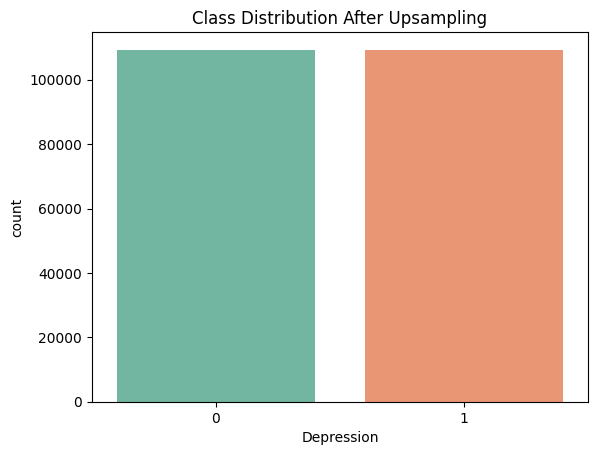

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Depression'].value_counts())

sns.countplot(data=df, x='Depression', palette='Set2')
plt.title("Class Distribution After Upsampling")
plt.show()


In [14]:
df['Depression'].value_counts()

Depression
1    109310
0    109310
Name: count, dtype: int64

In [15]:
import sklearn
print(sklearn.__version__)


1.6.1


In [17]:

city_label_encoding = {
    'Kalyan': 0,
    'Patna': 1,
    'Vasai-Virar': 2,
    'Kolkata': 3,
    'Ahmedabad': 4,
    'Meerut': 5,
    'Ludhiana': 6,
    'Pune': 7,
    'Rajkot': 8,
    'Visakhapatnam': 9,
    'Srinagar': 10,
    'Mumbai': 11,
    'Indore': 12,
    'Agra': 13,
    'Surat': 14,
    'Varanasi': 15,
    'Vadodara': 16,
    'Hyderabad': 17,
    'Kanpur': 18,
    'Jaipur': 19,
    'Thane': 20,
    'Lucknow': 21,
    'Nagpur': 22,
    'Bangalore': 23,
    'Chennai': 24,
    'Ghaziabad': 25,
    'Delhi': 26,
    'Bhopal': 27,
    'Faridabad': 28,
    'Nashik': 29,
    'Gurgaon': 30
}

# Assume you have a DataFrame called df with a 'city' column
# Apply city label encoding
df['city_encoded'] = df['City'].map(city_label_encoding)
df=df.drop(columns='City')


In [16]:


# Your predefined label encoding dictionary
label_encoding = {
    'Teacher': 0,
    'Content Writer': 1,
    'HR Manager': 2,
    'Architect': 3,
    'Consultant': 4,
    'Pharmacist': 5,
    'Doctor': 6,
    'Business Analyst': 7,
    'Entrepreneur': 8,
    'Chemist': 9,
    'Chef': 10,
    'Educational Consultant': 11,
    'Data Scientist': 12,
    'Researcher': 13,
    'Lawyer': 14,
    'Customer Support': 15,
    'Marketing Manager': 16,
    'Pilot': 17,
    'Travel Consultant': 18,
    'Plumber': 19,
    'Sales Executive': 20,
    'Manager': 21,
    'Judge': 22,
    'Electrician': 23,
    'Financial Analyst': 24,
    'Software Engineer': 25,
    'Civil Engineer': 26,
    'UX/UI Designer': 27,
    'Digital Marketer': 28,
    'Accountant': 29,
    'Mechanical Engineer': 30,
    'Graphic Designer': 31,
    'Research Analyst': 32,
    'Investment Banker': 33,
    'Family Consultant': 34,
    'Medical Doctor': 35
}

# Assume you already have a DataFrame called df with a 'profession' column
# Apply label encoding
df['profession_encoded'] = df['Profession'].map(label_encoding)
df=df.drop(columns='Profession')




In [18]:


# Predefined label encoding for degrees
degree_label_encoding = {
    'B.Ed': 0,
    'B.Arch': 1,
    'B.Com': 2,
    'BHM': 3,
    'BSc': 4,
    'B.Pharm': 5,
    'BCA': 6,
    'M.Ed': 7,
    'MCA': 8,
    'BBA': 9,
    'MSc': 10,
    'LLM': 11,
    'LLB': 12,
    'M.Tech': 13,
    'M.Pharm': 14,
    'B.Tech': 15,
    'MBA': 16,
    'BA': 17,
    'ME': 18,
    'MD': 19,
    'MHM': 20,
    'MBBS': 21,
    'BE': 22,
    'PhD': 23,
    'M.Com': 24,
    'MA': 25,
    'M.Arch': 26
}

# Assuming you have a DataFrame `df` with a 'degree' column
# Apply the encoding
df['degree_encoded'] = df['Degree'].map(degree_label_encoding)
df=df.drop(columns='Degree')


In [19]:
pd.set_option('display.max_columns', None)
df

,Gender,Age,Working Professional or Student,Work Pressure,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep_Category,profession_encoded,city_encoded,degree_encoded
0,1.0,18.0,0.0,3.757022,2.896914,2,1,7.0,2.0,1,1,2,0,9,0
1,1.0,24.0,0.0,3.162791,2.956589,2,1,8.0,3.0,0,1,1,0,14,10
2,1.0,23.0,0.0,3.359703,2.650185,1,1,8.0,4.0,0,1,3,0,26,25
3,1.0,25.0,0.0,3.448505,2.618574,2,1,9.0,2.0,0,0,2,0,1,0
4,1.0,27.0,0.0,3.283636,2.800000,2,1,9.0,4.0,0,1,1,0,29,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218615,0.0,20.0,0.0,3.508117,2.928803,2,1,0.0,5.0,1,1,1,0,2,3
218616,0.0,57.0,1.0,5.000000,2.000000,1,0,10.0,5.0,1,0,1,4,2,10
218617,1.0,21.0,0.0,3.751261,2.436975,2,1,9.0,1.0,1,1,1,2,0,7
218618,1.0,21.0,0.0,3.751261,2.436975,1,1,5.0,5.0,1,1,3,2,17,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218620 entries, 0 to 218619
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 218620 non-null  float64
 1   Age                                    218620 non-null  float64
 2   Working Professional or Student        218620 non-null  float64
 3   Work Pressure                          218620 non-null  float64
 4   Job Satisfaction                       218620 non-null  float64
 5   Dietary Habits                         218620 non-null  int64  
 6   Have you ever had suicidal thoughts ?  218620 non-null  int64  
 7   Work/Study Hours                       218620 non-null  float64
 8   Financial Stress                       218620 non-null  float64
 9   Family History of Mental Illness       218620 non-null  int64  
 10  Depression                             218620 non-null  

In [21]:
df.to_csv("/Users/somesh-19583/Desktop/Health Care/playground-series-s4e11/Preprocessed_Data.csv",index=False)
print("Successfully saved !!!!")

Successfully saved !!!!


In [22]:
pd.set_option('display.max_columns', None)
df.sample(5)

,Gender,Age,Working Professional or Student,Work Pressure,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep_Category,profession_encoded,city_encoded,degree_encoded
164636,1.0,21.0,0.0,3.751261,2.436975,2,1,12.0,5.0,1,1,2,2,4,17
209461,1.0,27.0,0.0,3.283636,2.800000,2,1,3.0,3.0,1,0,3,0,16,9
129672,0.0,55.0,1.0,2.000000,1.000000,1,0,2.0,5.0,0,0,1,19,13,18
90686,1.0,21.0,0.0,3.751261,2.436975,2,1,10.0,1.0,1,1,1,2,4,1
169891,1.0,47.0,1.0,1.000000,5.000000,0,1,3.0,3.0,0,0,3,2,22,10


In [23]:
df.columns

Index(['Gender', 'Age', 'Working Professional or Student', 'Work Pressure',
       'Job Satisfaction', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Sleep_Category', 'profession_encoded', 'city_encoded',
       'degree_encoded'],
      dtype='object')

In [24]:
numerical_cols = ['Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

categorical_cols=['Gender','profession_encoded','city_encoded','degree_encoded', 'Working Professional or Student', 'Sleep_Category', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']


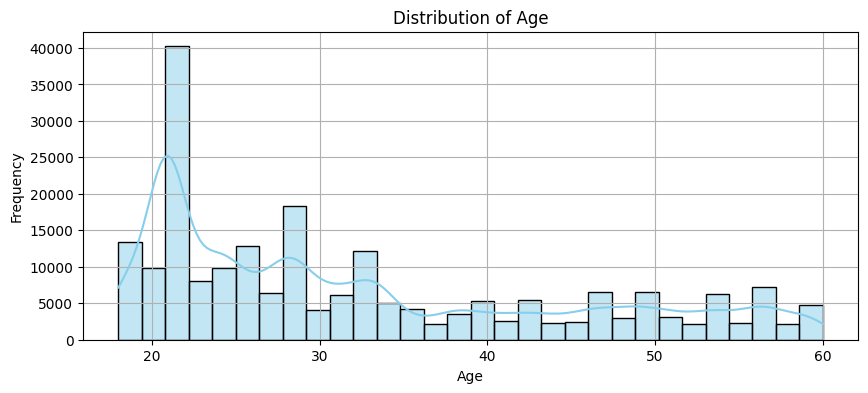

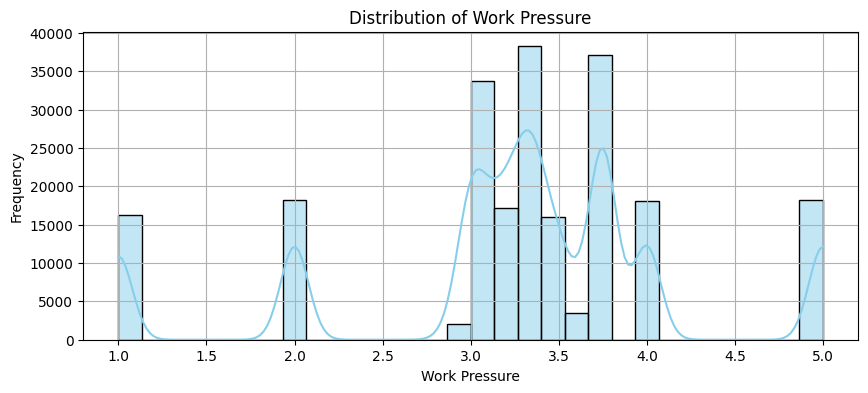

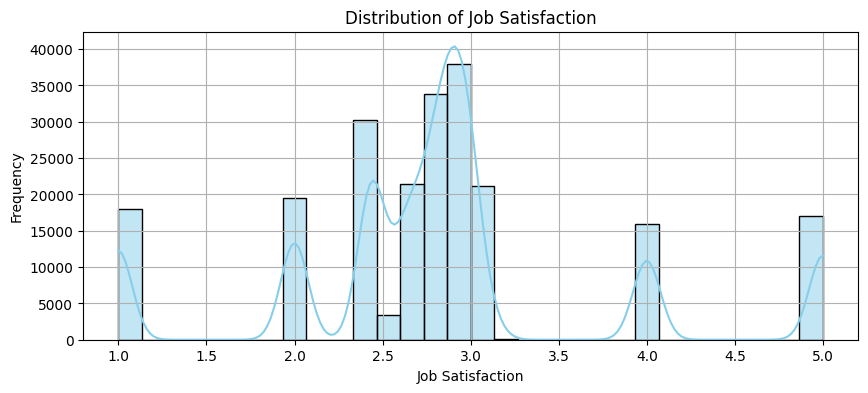

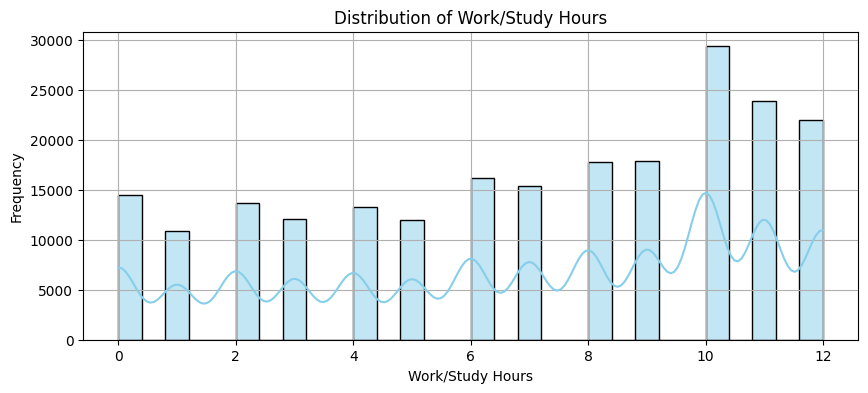

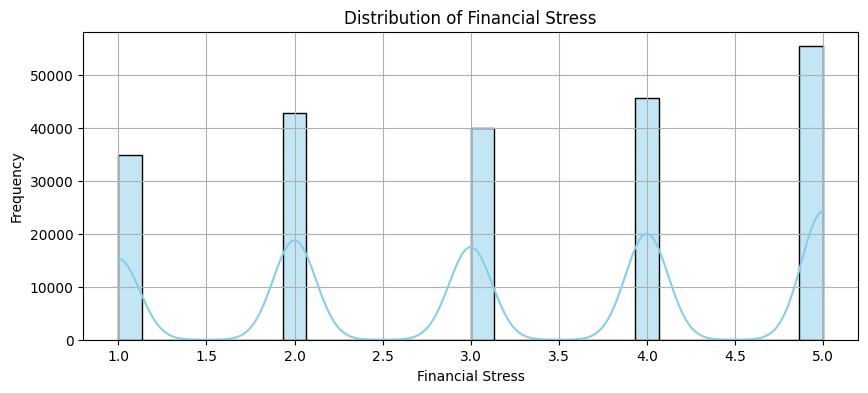


--- Categorical Features EDA ---

Value counts for Gender:
Gender
1.0    132319
0.0     86301
Name: count, dtype: int64

Value counts for profession_encoded:
profession_encoded
0     105332
2      34798
1       8032
3       5087
4       4402
5       4053
6       3479
7       3317
10      3094
11      3084
8       3078
9       3061
12      2539
13      2407
14      2396
15      2159
16      2092
17      1990
18      1940
21      1912
22      1890
19      1849
20      1838
24      1680
26      1631
23      1625
25      1604
27      1549
28      1491
29      1439
31      1330
30      1287
32       718
33       437
Name: count, dtype: int64

Value counts for city_encoded:
city_encoded
0     12242
10     9871
2      9365
17     8852
20     8771
4      8347
7      8347
6      8166
1      7974
3      7883
21     7755
5      7643
11     7548
9      7504
13     7424
8      7318
14     7203
19     7152
27     6544
26     6378
24     6326
12     6242
22     6042
15     5907
23     5862
16     56

/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/2502256658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Set2')


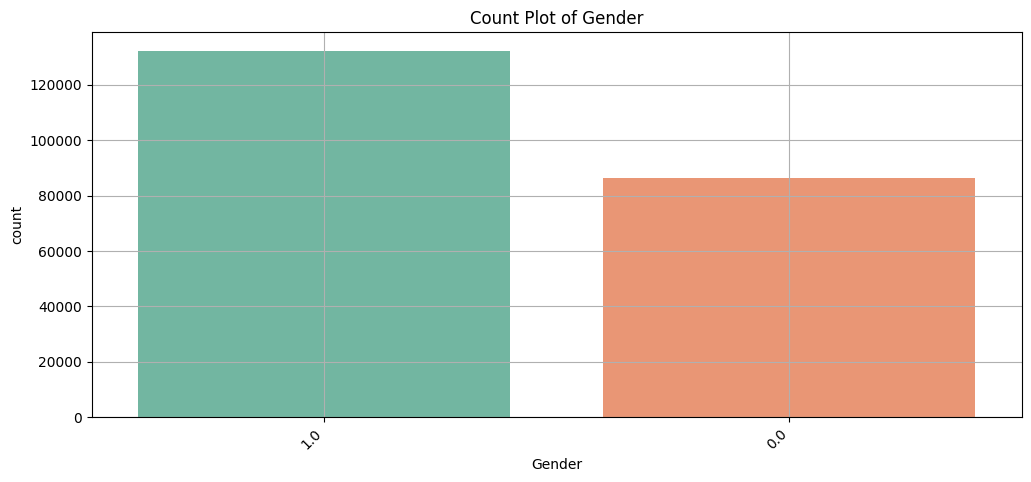

/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/2502256658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Set2')


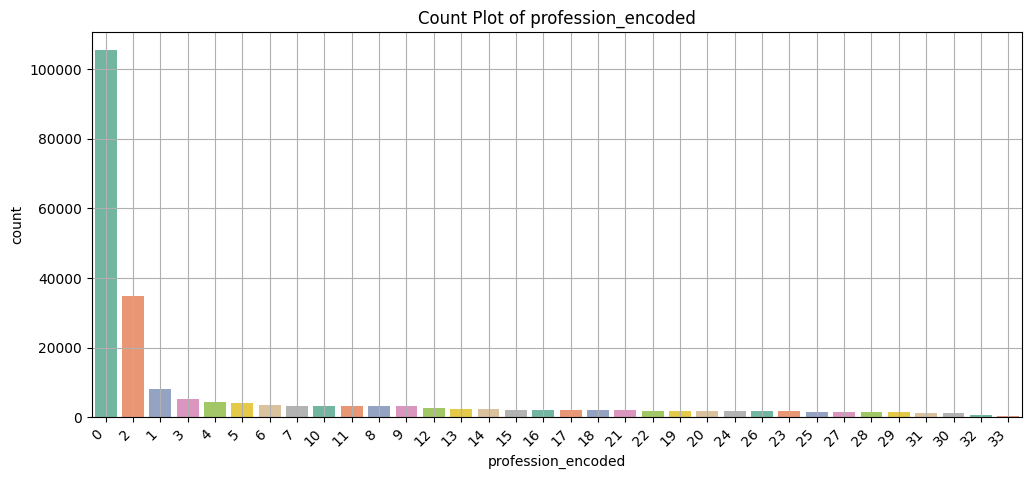

/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/2502256658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Set2')


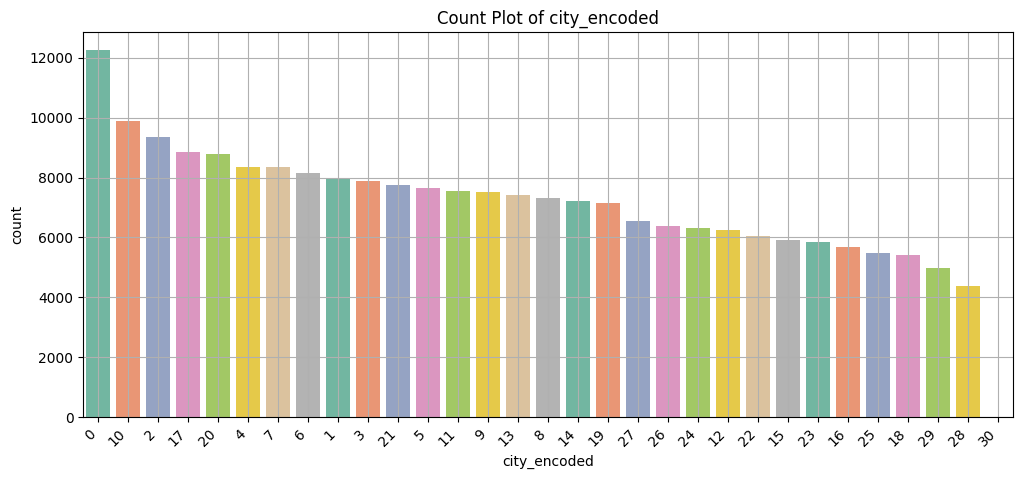

/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/2502256658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Set2')


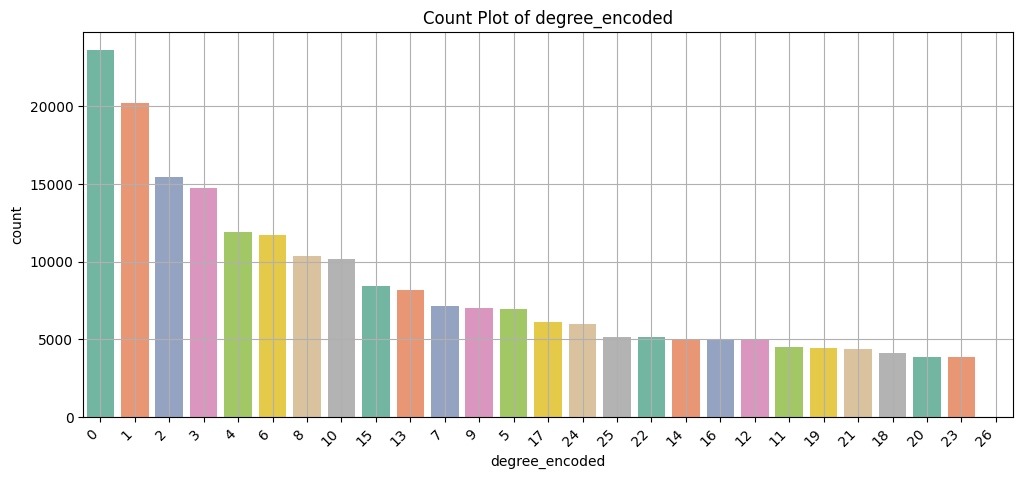

/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/2502256658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Set2')


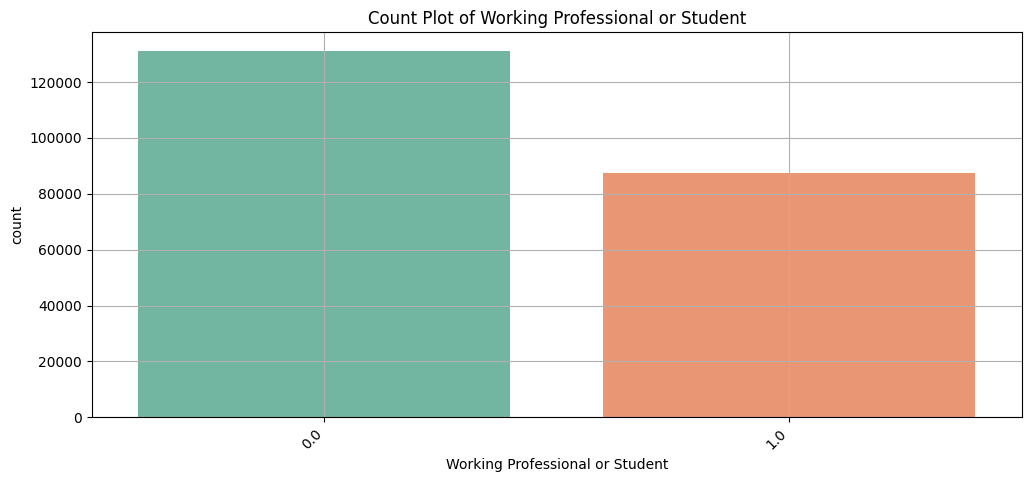

/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/2502256658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Set2')


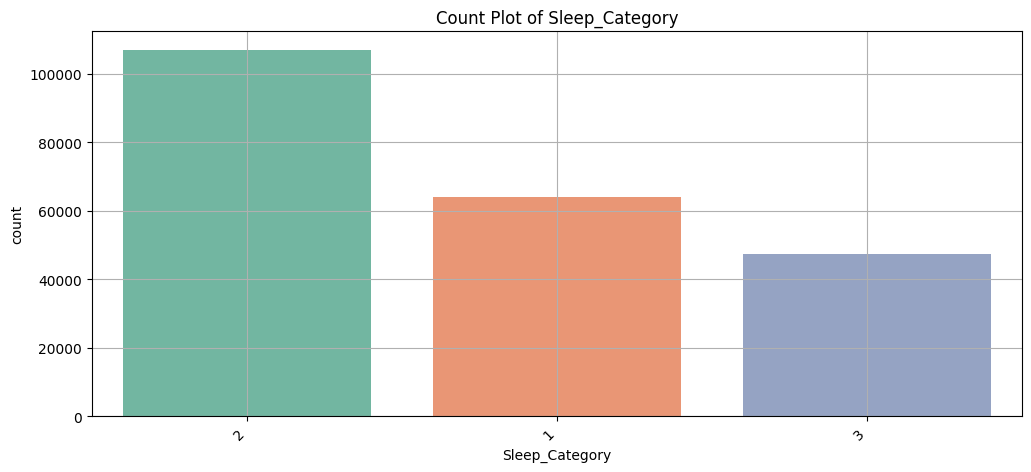

/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/2502256658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Set2')


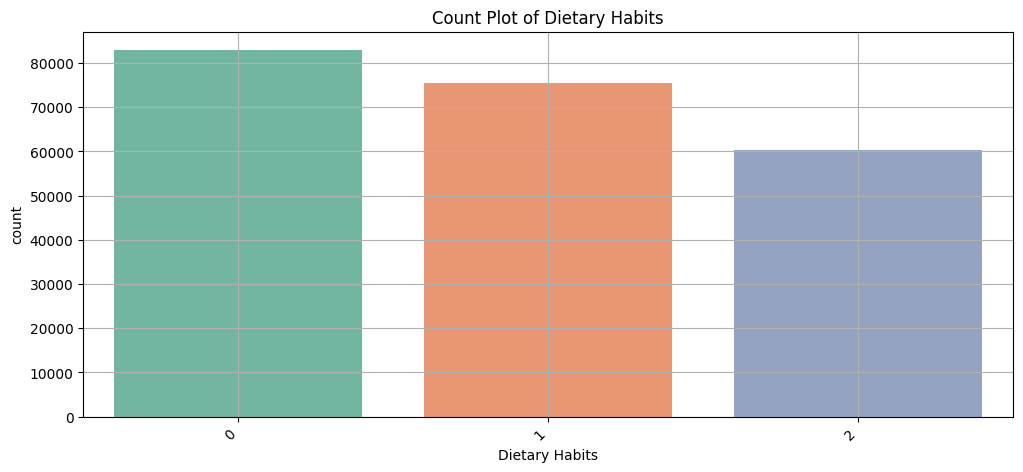

/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/2502256658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Set2')


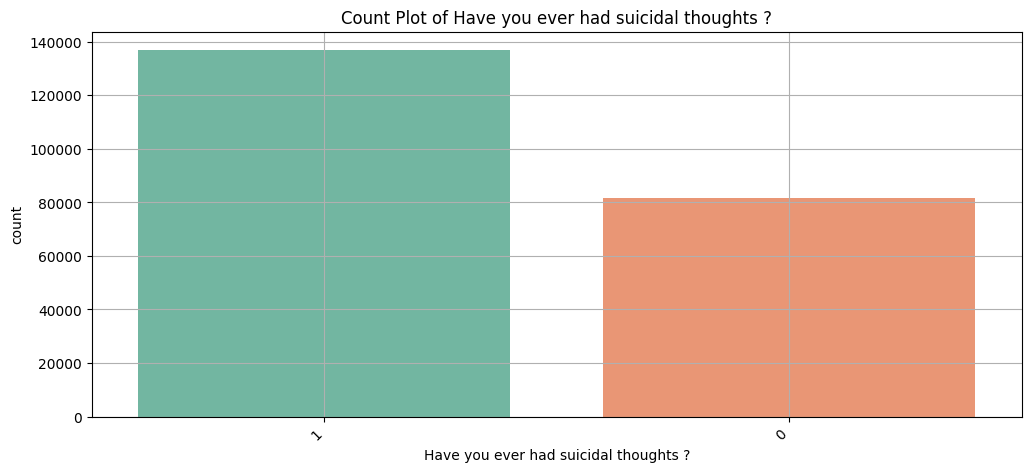

/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/2502256658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Set2')


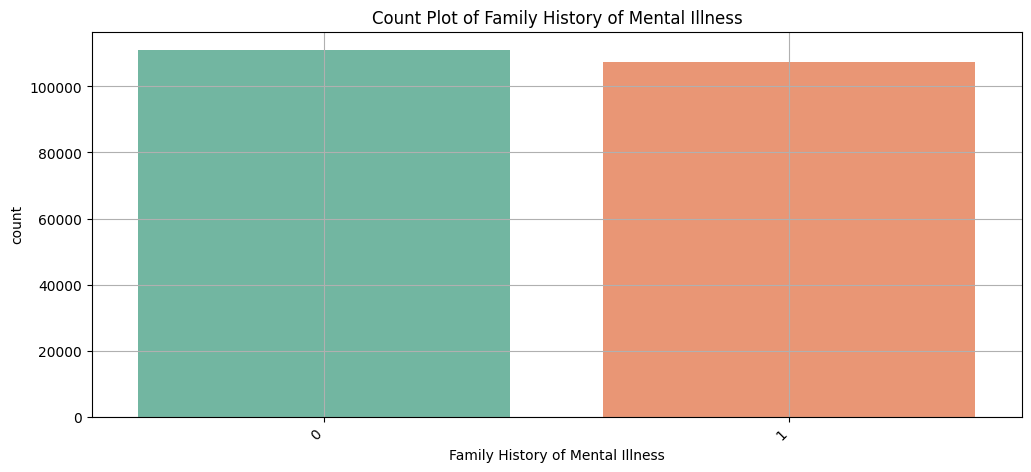

/var/folders/wx/4rg4nk210z1b7k5t2v6q8gj40000gp/T/ipykernel_20195/2502256658.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='Set2')


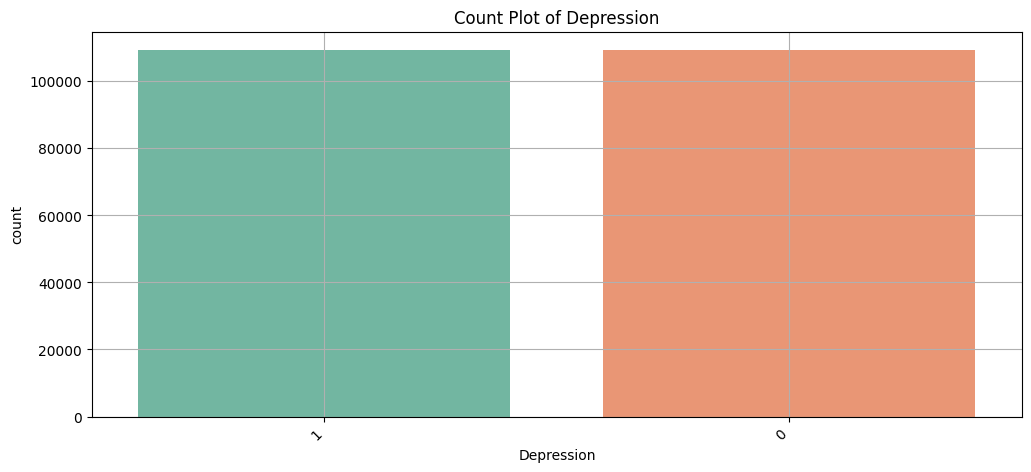

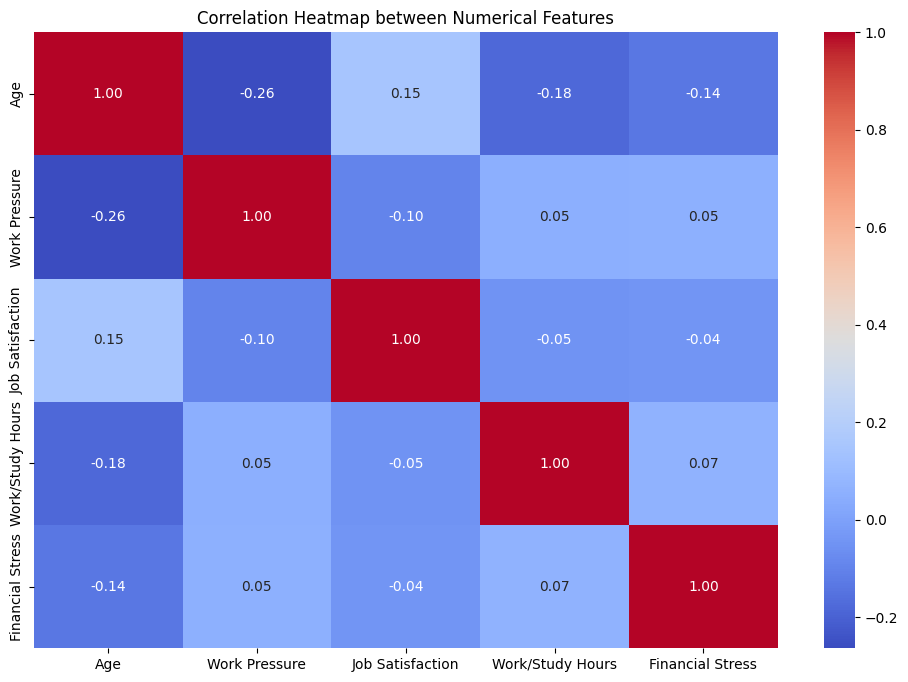

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# -------------------- NUMERICAL FEATURES EDA --------------------

# Plotting Numerical Distributions
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# -------------------- CATEGORICAL FEATURES EDA --------------------
print("\n--- Categorical Features EDA ---")
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

# Plotting Categorical Distributions
for col in categorical_cols:
    plt.figure(figsize=(12, 5))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

# -------------------- CORRELATION HEATMAP --------------------
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 8))
    corr = df[numerical_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap between Numerical Features')
    plt.show()


In [26]:
print(df['profession_encoded'].value_counts())


profession_encoded
0     105332
2      34798
1       8032
3       5087
4       4402
5       4053
6       3479
7       3317
10      3094
11      3084
8       3078
9       3061
12      2539
13      2407
14      2396
15      2159
16      2092
17      1990
18      1940
21      1912
22      1890
19      1849
20      1838
24      1680
26      1631
23      1625
25      1604
27      1549
28      1491
29      1439
31      1330
30      1287
32       718
33       437
Name: count, dtype: int64
